In [1]:
import pandas as pd
df = pd.read_csv('/tscc/nfs/home/hsher/ps-yeolab5/karen_data/homer_output_human.tsv',
                 sep = '\t')

In [2]:
df.head()

,FASTA ID,Offset,Sequence,Motif Name,Strand,MotifScore
0,3452195,-7,GGTAAGGT,ZRANB2_GGTAAGGT,+,10.117872
1,3449758,-13,GGTAAGGT,ZRANB2_GGTAAGGT,+,10.117872
2,3449757,17,GGTAAGGT,ZRANB2_GGTAAGGT,+,10.117872
3,3448151,-1,GGTAAGGT,ZRANB2_GGTAAGGT,+,10.117872
4,3447693,-4,GGTAAGGT,ZRANB2_GGTAAGGT,+,10.117872


In [3]:
import pandas as pd
from plot_params import *
import pandas as pd
data=pd.read_csv(outdir / 'Human_annotated.csv.gz', index_col = 0)

In [4]:
data.head()

,transcript_id,deletion_index_start,deletion_index_end,difference,synapse_probability,start_annotation,end_annotation,subseq
0,ENST00000005082,0,60,0.000854,0.014709,UTR5,UTR5,GCTAGCCGTAGGTCGTGTGACCCGCAGGCACCGGGAGATCCAGAAG...
1,ENST00000005082,30,90,0.000854,0.014709,UTR5,CDS,CCGGGAGATCCAGAAGTGAAACGCCAGGCTCTCTGGAGGCCAGGAG...
2,ENST00000005082,60,120,0.000854,0.014709,UTR5,CDS,CTCTGGAGGCCAGGAGATGACTCTGTTGACGTTCAGGGATGTGGCC...
3,ENST00000005082,90,150,0.001099,0.014954,CDS,CDS,GTTCAGGGATGTGGCCATAGAATTCTCCCTGGAGGAGTGGAAATGC...
4,ENST00000005082,120,180,0.001099,0.014954,CDS,CDS,GGAGGAGTGGAAATGCCTGGACCTCGCTCAGCAGAATTTGTACAGG...


In [5]:
data['annotation']=data.apply(
    lambda row: 'UTR5' if row['start_annotation']=='UTR5' and row['end_annotation']=='UTR5' else
     'UTR3' if row['start_annotation']=='UTR3' and row['end_annotation']=='UTR3' else 'CDS', axis = 1)

In [6]:
import numpy as np
data['difference_bin'] = pd.cut(data['difference'], bins = [-np.inf, -0.1, 0.1, np.inf],
                               labels = ['<-0.1', 'middle', '>0.1'])

<AxesSubplot:>

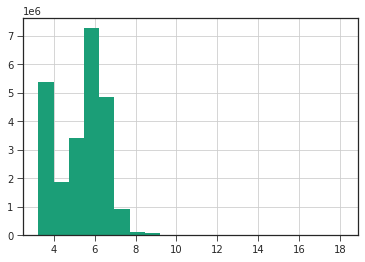

In [7]:
df['MotifScore'].hist(bins = 20)

In [8]:
from scipy.stats import fisher_exact,chisquare
def testing(df):
    ''' perform fisher exact or chisq given contingency table'''
    if df.shape != (2,2):
        # some outcomes are unobserved
        print(df.shape)
        print('no binding is observed in')
        return 1, np.nan
    if df.le(5).any().any():
        odds_ratio, pvalue = fisher_exact(df)
    else:
        chi, pvalue = chisquare(df.loc[True], (df.loc[True].sum())*df.loc[False].div(df.loc[False].sum()))
        odds_ratio = (df.loc[True, True]/df.loc[True, False])/(df.loc[False, True]/df.loc[False, False])
    return pvalue, odds_ratio


In [9]:
stat_individual = []
for exp in df['Motif Name'].unique():
    for cat in ['<-0.1', '>0.1']:
        has_motif = set(df.loc[df['Motif Name']==exp, 'FASTA ID'])
        
        positive = set(data.loc[
                                    (data['difference_bin']==cat),
                                    ].index)
        negative = set(data.loc[
                                    (data['difference_bin']=='middle')].index)
                                    
        contingency = pd.DataFrame(np.array([[len(has_motif.intersection(positive)), len(positive-has_motif)],
                              [len(has_motif.intersection(negative)), len(negative-has_motif)]]
                             ),
                                   index = [True, False],
                                   columns = [True, False]
                                  )
    
        pv, or_ = testing(contingency)
        stat_individual.append([exp, cat, pv, or_])
        print(exp)
stat_individual = pd.DataFrame(
    stat_individual,columns = ['experiment', 'category', 'p-value', 'odds ratio']) 

ZRANB2_GGTAAGGT
ZRANB2_GGTAAGGT
ZFP36_TATTTATT
ZFP36_TATTTATT
CELF3_GTGTGTGT
CELF3_GTGTGTGT
MEX3D_TTGTTTATT
MEX3D_TTGTTTATT
CSTF2T_CGTAGCGT
CSTF2T_CGTAGCGT
ZC3H8_GCTTGC
ZC3H8_GCTTGC
TARDBP_GTGTGAATGG
TARDBP_GTGTGAATGG
HEXIM2_GCGACGGT
HEXIM2_GCGACGGT
YBX2_TAACATC
YBX2_TAACATC
SART3_GTTAGC
SART3_GTTAGC
ELAVL4_TTTATT
ELAVL4_TTTATT
HEXIM1_CGACGGG
HEXIM1_CGACGGG
RBM38_TGGTGTGTGTGT
RBM38_TGGTGTGTGTGT
HNRNPA3_AGGTTAGGG
HNRNPA3_AGGTTAGGG
PCBP1_CCCC
PCBP1_CCCC
HNRNPL_CAACA
HNRNPL_CAACA
SNRNP70_GTTCAAGGTG
SNRNP70_GTTCAAGGTG
RBM28_GAGGCCGAGCGGTGG
RBM28_GAGGCCGAGCGGTGG
MCM3AP_CGCCAGTGCG
MCM3AP_CGCCAGTGCG
MEX3B_AGAGTTTAT
MEX3B_AGAGTTTAT
LARP7_TCGTGATG
LARP7_TCGTGATG
KHDRBS2_TAAAA
KHDRBS2_TAAAA
ELAVL1_TTTTGTTT
ELAVL1_TTTTGTTT
HNRNPCL1_TTTTGG
HNRNPCL1_TTTTGG
DAZAP1_TAGGTTAG
DAZAP1_TAGGTTAG
CELF4_GTGTGTG
CELF4_GTGTGTG
ELAVL3_TTT
ELAVL3_TTT
SNRPB2_CATTGCAC
SNRPB2_CATTGCAC
MSI2_GTAGTGGTAG
MSI2_GTAGTGGTAG
ZC3H12A_GCAGGTAAGTGC
ZC3H12A_GCAGGTAAGTGC
RBM4B_TGTTGCGCGGG
RBM4B_TGTTGCGCGGG
RBM6_TGCGCTCCTGCC
RBM6

In [11]:
stat_individual = pd.DataFrame(
    stat_individual,columns = ['experiment', 'category', 'p-value', 'odds ratio']) 

In [21]:
from statsmodels.stats.multitest import fdrcorrection
fdr_thres = 0.2
stat_individual['sig'],stat_individual['FDR'] = fdrcorrection(stat_individual['p-value'], alpha = fdr_thres)
stat_individual['l2or'] = np.log2(stat_individual['odds ratio'])
stat_individual['-log10 FDR']= -np.log10(stat_individual['FDR']+stat_individual.loc[stat_individual['FDR']>0, 'FDR'].min())

In [22]:
syngo = pd.read_excel('synGo/syngo_genes.xlsx')

In [23]:
stat_individual['RBP'] = stat_individual['experiment'].str.split('_', expand = True)[0]

In [24]:
stat_individual['is_SynGO']=stat_individual['RBP'].isin(syngo['hgnc_symbol'])

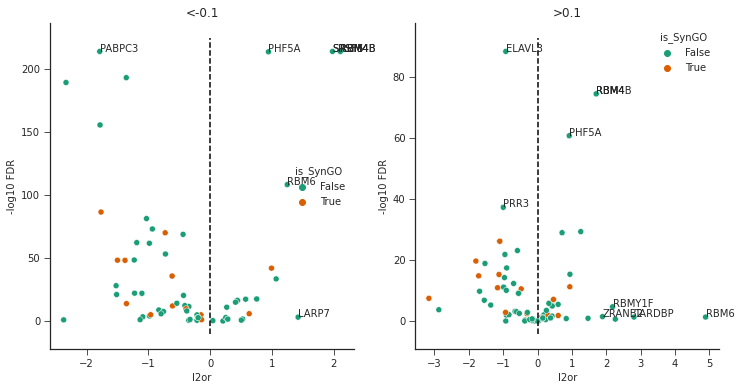

In [26]:
f, axes = plt.subplots(1,2, figsize = (12,6))
for ax, (name, group) in zip(axes.flatten(),stat_individual.groupby(by = ['category'])):
    sns.scatterplot(data = group, x = 'l2or', y = '-log10 FDR', ax = ax, hue = 'is_SynGO')
    ax.set_title(name)
    sig1 = group.loc[(group['sig'])].sort_values(by = 'odds ratio', ascending = False).iloc[:5]
    sig2 = group.loc[(group['sig'])].sort_values(by = '-log10 FDR', ascending = False).iloc[:5]
    sig = pd.concat([sig1, sig2], axis = 0)
    for index, row in sig.iterrows():
        ax.text(row['l2or'], row['-log10 FDR'], row['experiment'].split('_')[0])
    ax.vlines(x = 0, ymin = ax.get_ylim()[0],ymax = ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
sns.despine()

In [ ]:
outdir

In [18]:
stat_individual.to_csv(outdir / 'motif_enrichment_human_all.csv')

In [28]:
stat_individual.loc[(stat_individual['sig'])&(stat_individual['category']=='<-0.1')
].sort_values(by = 'odds ratio')

,experiment,category,p-value,odds ratio,sig,FDR,l2or,-log10 FDR,RBP,is_SynGO
0,ZRANB2_GGTAAGGT,<-0.1,5.773102e-02,0.000000,True,8.134839e-02,-inf,1.089651,ZRANB2,False
76,ZC3H12C_AGGTAAGT,<-0.1,1.774294e-02,0.000000,True,2.711929e-02,-inf,1.566722,ZC3H12C,False
70,RC3H1_CGTTTAG,<-0.1,4.029785e-03,0.000000,True,6.825221e-03,-inf,2.165883,RC3H1,False
48,DAZAP1_TAGGTTAG,<-0.1,5.798236e-02,0.000000,True,8.134839e-02,-inf,1.089651,DAZAP1,False
38,MEX3B_AGAGTTTAT,<-0.1,1.196230e-02,0.000000,True,1.922148e-02,-inf,1.716213,MEX3B,False
...,...,...,...,...,...,...,...,...,...,...
142,RBM6_CGTCC,<-0.1,2.781700e-110,2.371601,True,5.229597e-109,1.245861,108.281532,RBM6,False
40,LARP7_TCGTGATG,<-0.1,3.810999e-04,2.679643,True,7.093740e-04,1.422041,3.149125,LARP7,False
78,SRSF5_GCCGCC,<-0.1,0.000000e+00,3.940233,True,0.000000e+00,1.978281,213.905421,SRSF5,False
124,RBM4B_GCGCG,<-0.1,0.000000e+00,4.304454,True,0.000000e+00,2.105830,213.905421,RBM4B,False


In [ ]:
stat = []
for exp in df['Motif Name'].unique():
    for annotation in ['UTR5', 'CDS', 'UTR3']:
        for cat in ['<-0.1', '>0.1']:
            has_motif = set(df.loc[df['Motif Name']==exp, 'FASTA ID'])
            
            positive = set(data.loc[(data['annotation']==annotation)&
                                        (data['difference_bin']==cat),
                                        ].index)
            negative = set(data.loc[(data['annotation']==annotation)&
                                        (data['difference_bin']=='middle')].index)
                                        
            contingency = pd.DataFrame(np.array([[len(has_motif.intersection(positive)), len(positive-has_motif)],
                                  [len(has_motif.intersection(negative)), len(negative-has_motif)]]
                                 ),
                                       index = [True, False],
                                       columns = [True, False]
                                      )
        
            pv, or_ = testing(contingency)
            stat.append([annotation, exp, cat, pv, or_])
            print(exp)
stat = pd.DataFrame(stat,columns = ['annotation', 'experiment', 'category', 'p-value', 'odds ratio']) 

In [ ]:
from statsmodels.stats.multitest import fdrcorrection
fdr_thres = 0.2
stat['sig'],stat['FDR'] = fdrcorrection(stat['p-value'], alpha = fdr_thres)

In [ ]:
stat.loc[stat['sig']]

In [ ]:
stat['l2or'] = np.log2(stat['odds ratio'])
stat['-log10 FDR']= -np.log10(stat['FDR'])

In [ ]:
stat.to_csv(outdir / 'motif_enrichment_human.csv')

In [ ]:
f, axes = plt.subplots(2,3, figsize = (15,10))
for ax, (name, group) in zip(axes.flatten(),stat.groupby(by = ['category', 'annotation'])):
    group.plot.scatter(x = 'l2or', y = '-log10 FDR', ax = ax)
    ax.set_title(name)
    sig1 = group.loc[(group['sig'])].sort_values(by = 'odds ratio', ascending = False).iloc[:5]
    sig2 = group.loc[(group['sig'])].sort_values(by = '-log10 FDR', ascending = False).iloc[:5]
    sig = pd.concat([sig1, sig2], axis = 0)
    for index, row in sig.iterrows():
        ax.text(row['l2or'], row['-log10 FDR'], row['experiment'].split('_')[0])
    ax.vlines(x = 0, ymin = ax.get_ylim()[0],ymax = ax.get_ylim()[1], linestyle = 'dashed', color = 'black')
sns.despine()

In [ ]:
contigency = np.array([[len(has_motif.intersection(positive)), len(positive-has_motif)],
                                  [len(has_motif.intersection(negative)), len(negative-has_motif)]]
                                 )

In [ ]:
contigency

In [ ]:
pd.pivot_table(df, index = 'FASTA ID', columns = 'Motif Name', values = 'MotifScore')